# Inferencia Estadística y Reconocimiento de Patrones - TP 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation as MAD

data_wine = pd.read_csv('data/winequality-red.csv', sep=';')
np.random.seed(42)

In [3]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data_wine['quality'].value_counts(normalize=True)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64

### Buscar formas de verificar la representatividad de la submuestra de n=70

In [5]:
sample = data_wine.sample(n=70)

In [6]:
B = 5000
n = len(sample)
bs_mad = np.empty(B)

for i in range(B):
    bs_sample =  sample.sample(n=n, replace=True)
    bs_mad[i] = MAD(bs_sample['pH'])

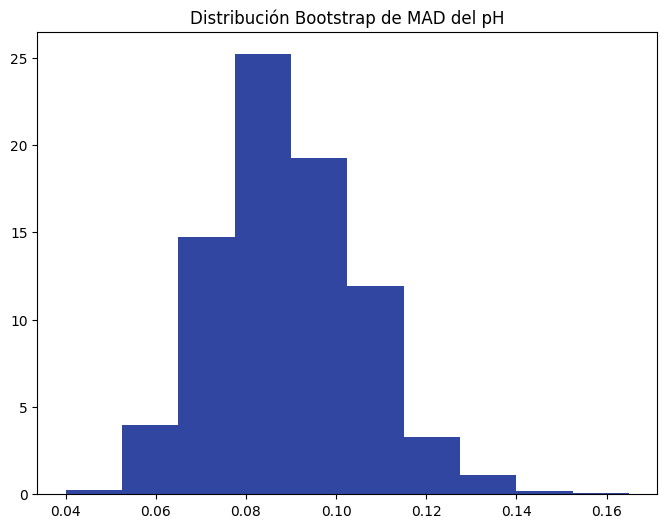

In [7]:
plt.figure(figsize=(8,6))
plt.hist(bs_mad, color="#3146a0", density=True)
plt.title('Distribución Bootstrap de MAD del pH')
plt.show()

Como la estimación de la función de densidad de probabilidad del estimador MAD luce aproximadamente acampanado, construimos el intervalo de confianza de nivel 0,95 de la siguiente manera

In [8]:
se = np.std(bs_mad, ddof=1)

bott = MAD(sample['pH']) - 1.96 * se
top = MAD(sample['pH']) + 1.96 * se 

print(f'Intervalo bootstrap para la MAD de nivel 0,95:\n [{bott:.4f} : {top:.4f}]')

Intervalo bootstrap para la MAD de nivel 0,95:
 [0.0524 : 0.1176]


Intervalo percentílico:

In [9]:
inf, sup = np.percentile(bs_mad, [2.5, 97.5])

print(f'Intervalo bootstrap percentil para la MAD de nivel 0,95:\n [{inf:.4f} : {sup:.4f}]')

Intervalo bootstrap percentil para la MAD de nivel 0,95:
 [0.0600 : 0.1250]
